# 00_Consumo de API

#### 1ra Forma

In [572]:
import requests
import json

token = '5dUyUf11dL2xaTjmpIQChAbz3'
# url = f'https://healthdata.gov/resource/g62h-syeh.json?$$app_token={token}&$limit=1000'
limit = '?$limit=2000'
url = f'https://healthdata.gov/resource/g62h-syeh.json' + limit
_headers = {'Content-Type': 'application/json', 'X-App-Token':token}
response = requests.get(url, headers=_headers)
dataJson = response.json()

In [573]:
len(dataJson)

2000

#### 2da Forma

In [44]:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# El cliente no autenticado solo funciona con conjuntos de datos públicos. Nota 'None'
# en lugar del token de la aplicación, y sin nombre de usuario ni contraseña:
token = '5dUyUf11dL2xaTjmpIQChAbz3'
client = Socrata("healthdata.gov", token,
                 username='antivok2@gmail.com',
                 password='Minari123')

# First 2000 results, returned as JSON from API / convertido a la lista de Python de diccionarios por sodapy.
results = client.get("g62h-syeh", limit=50000)
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

***Formato de serie temporal que se remonta al 1 de enero de 2020***

In [45]:
results_df.sort_values(by = 'date')

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage,staffed_icu_pediatric_patients_confirmed_covid,on_hand_supply_therapeutic_c_bamlanivimab_etesevimab_courses,previous_week_therapeutic_c_bamlanivimab_etesevimab_courses_used,previous_day_admission_pediatric_covid_confirmed_0_4,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_12_17,previous_day_admission_pediatric_covid_confirmed_5_11
17853,MN,2020-01-01T00:00:00.000,0,0,1,0,0,1,0,1,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13763,IN,2020-01-01T00:00:00.000,0,0,1,0,0,1,0,1,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15668,PR,2020-01-01T00:00:00.000,0,0,1,0,0,1,0,1,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21203,LA,2020-01-01T00:00:00.000,0,0,1,0,0,1,NaN,0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NC,2020-01-01T00:00:00.000,0,0,1,0,0,1,0,1,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44133,NY,2022-08-08T00:00:00.000,2,156,13,7,151,13,396,162,...,162,455,162,14,6144,92,10,4,4,0
36060,DE,2022-08-08T00:00:00.000,2,6,2,4,5,1,13,9,...,9,76,9,1,435,0,1,0,1,0
41826,AK,2022-08-08T00:00:00.000,1,20,2,2,19,2,3,23,...,23,9,23,0,640,0,1,0,0,0
34586,KS,2022-08-08T00:00:00.000,7,108,8,20,96,7,1,120,...,120,44,120,2,2402,1,0,0,0,0


# 01_Cuestionario

#### ***1. ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?***

In [574]:
columns1 = ['date', 'state', 'inpatient_bed_covid_utilization_numerator',  'previous_day_admission_adult_covid_confirmed', 
            'previous_day_admission_adult_covid_confirmed_20_29',
             'previous_day_admission_adult_covid_confirmed_40_49', 
             'previous_day_admission_adult_covid_confirmed_50_59', 
             'previous_day_admission_adult_covid_confirmed_30_39', 
             'previous_day_admission_adult_covid_confirmed_60_69', 
             'previous_day_admission_adult_covid_confirmed_70_79',
             'previous_day_admission_adult_covid_confirmed_80',
             'previous_day_admission_adult_covid_confirmed_unknown']

In [575]:
df_01 = results_df[columns1].sort_values(by='date')
df_01['date'] = pd.to_datetime(df_01['date'])
df_01.insert(loc=1, column='year', value = df_01['date'].dt.year)
df_01.insert(loc=2, column='month', value = df_01['date'].dt.month)
df_01 = df_01[df_01['year'] == 2020]
df_01 = df_01[(df_01['month'] >= df_01['month'].min()) & (df_01['month'] <= df_01['month'].min() + 5)]

In [576]:
df_01

,date,year,month,state,inpatient_bed_covid_utilization_numerator,previous_day_admission_adult_covid_confirmed,previous_day_admission_adult_covid_confirmed_20_29,previous_day_admission_adult_covid_confirmed_40_49,previous_day_admission_adult_covid_confirmed_50_59,previous_day_admission_adult_covid_confirmed_30_39,previous_day_admission_adult_covid_confirmed_60_69,previous_day_admission_adult_covid_confirmed_70_79,previous_day_admission_adult_covid_confirmed_80,previous_day_admission_adult_covid_confirmed_unknown
17853,2020-01-01,2020,1,MN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13763,2020-01-01,2020,1,IN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15668,2020-01-01,2020,1,PR,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21203,2020-01-01,2020,1,LA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,2020-01-01,2020,1,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10469,2020-06-30,2020,6,PA,479,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2641,2020-06-30,2020,6,OH,1289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5343,2020-06-30,2020,6,RI,45,0,0,0,0,0,0,0,0,NaN
4029,2020-06-30,2020,6,WY,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [577]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6694 entries, 17853 to 4654
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   date                                                  6694 non-null   datetime64[ns]
 1   year                                                  6694 non-null   int64         
 2   month                                                 6694 non-null   int64         
 3   state                                                 6694 non-null   object        
 4   inpatient_bed_covid_utilization_numerator             6436 non-null   object        
 5   previous_day_admission_adult_covid_confirmed          508 non-null    object        
 6   previous_day_admission_adult_covid_confirmed_20_29    194 non-null    object        
 7   previous_day_admission_adult_covid_confirmed_40_49    194 non-null    obje

In [578]:
## Valores faltantes
df_01.isna().sum()

date                                                       0
year                                                       0
month                                                      0
state                                                      0
inpatient_bed_covid_utilization_numerator                258
previous_day_admission_adult_covid_confirmed            6186
previous_day_admission_adult_covid_confirmed_20_29      6500
previous_day_admission_adult_covid_confirmed_40_49      6500
previous_day_admission_adult_covid_confirmed_50_59      6500
previous_day_admission_adult_covid_confirmed_30_39      6500
previous_day_admission_adult_covid_confirmed_60_69      6500
previous_day_admission_adult_covid_confirmed_70_79      6500
previous_day_admission_adult_covid_confirmed_80         6500
previous_day_admission_adult_covid_confirmed_unknown    6614
dtype: int64

In [579]:
## Cambiando al tipo de datos adecuado
df_01.iloc[:,4:14] = df_01.iloc[:,4:14].apply(lambda col: col.astype(float))

In [580]:
## Imputando los valores NaN
df_01.fillna(0, inplace=True)

In [581]:
df_01.tail(20)

,date,year,month,state,inpatient_bed_covid_utilization_numerator,previous_day_admission_adult_covid_confirmed,previous_day_admission_adult_covid_confirmed_20_29,previous_day_admission_adult_covid_confirmed_40_49,previous_day_admission_adult_covid_confirmed_50_59,previous_day_admission_adult_covid_confirmed_30_39,previous_day_admission_adult_covid_confirmed_60_69,previous_day_admission_adult_covid_confirmed_70_79,previous_day_admission_adult_covid_confirmed_80,previous_day_admission_adult_covid_confirmed_unknown
4570,2020-06-30,2020,6,LA,309.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7952,2020-06-30,2020,6,CO,179.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11111,2020-06-30,2020,6,VI,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10985,2020-06-30,2020,6,MS,883.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9093,2020-06-30,2020,6,KS,211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2573,2020-06-30,2020,6,MI,689.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1212,2020-06-30,2020,6,IL,1448.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11150,2020-06-30,2020,6,SD,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042,2020-06-30,2020,6,NM,131.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5945,2020-06-30,2020,6,OK,562.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***Se muestra la mayor ocupación hospitalaria por estado en los primeros 6 meses del 2020, adjuntandose la cifra de infectados en esos meses por cada estado***
- PD: Las cifras de infectados en los primeros 7 meses es minoritaria en la mayoría de estados, puede ser debido a que no se generó registros exactos en esos primeros meses o talves no hubo registros exactos, pasado los 7 meses se empieza a evidenciar un crecimiento exponencial debido a las olas de contagios. Por ese motivo se visualiza en casi todos los estados valores nulos 

In [582]:

pd.pivot_table(index='state', values=['inpatient_bed_covid_utilization_numerator','previous_day_admission_adult_covid_confirmed'], data=df_01, aggfunc={'inpatient_bed_covid_utilization_numerator':'max','previous_day_admission_adult_covid_confirmed':'sum'}).sort_values(by='inpatient_bed_covid_utilization_numerator', ascending=False)

,inpatient_bed_covid_utilization_numerator,previous_day_admission_adult_covid_confirmed
state,,
NY,13791.0,14.0
TX,7025.0,0.0
FL,7008.0,0.0
CA,6646.0,0.0
AZ,4843.0,1005.0
MI,4362.0,0.0
NJ,4247.0,0.0
MA,4094.0,0.0
IL,3699.0,0.0


***En NY queda exactamente el valor de adultos covid confirmados con respecto a las cantidades separadas por Rango etario, aunque en los demas estados no se visualiza una suma equtativa entre todos los valores de rango y el total de adultos covid confirmados***

In [583]:
pd.pivot_table(index='state', 
       values=['previous_day_admission_adult_covid_confirmed', 
       'previous_day_admission_adult_covid_confirmed_20_29',
       'previous_day_admission_adult_covid_confirmed_40_49', 
       'previous_day_admission_adult_covid_confirmed_50_59', 
       'previous_day_admission_adult_covid_confirmed_30_39', 
       'previous_day_admission_adult_covid_confirmed_60_69', 
       'previous_day_admission_adult_covid_confirmed_70_79',
       'previous_day_admission_adult_covid_confirmed_80',
       'previous_day_admission_adult_covid_confirmed_unknown'],
       data=df_01, aggfunc='sum').sort_values(by='previous_day_admission_adult_covid_confirmed', ascending=False).head(8)


,previous_day_admission_adult_covid_confirmed,previous_day_admission_adult_covid_confirmed_20_29,previous_day_admission_adult_covid_confirmed_30_39,previous_day_admission_adult_covid_confirmed_40_49,previous_day_admission_adult_covid_confirmed_50_59,previous_day_admission_adult_covid_confirmed_60_69,previous_day_admission_adult_covid_confirmed_70_79,previous_day_admission_adult_covid_confirmed_80,previous_day_admission_adult_covid_confirmed_unknown
state,,,,,,,,,
LA,3538.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZ,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NV,660.0,30.0,30.0,70.0,125.0,120.0,160.0,120.0,0.0
IA,420.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PR,195.0,5.0,40.0,10.0,95.0,60.0,55.0,55.0,35.0
HI,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NY,14.0,1.0,2.0,8.0,3.0,0.0,0.0,0.0,0.0
NE,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### ***2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena (2020-03-22 hasta 2020-06-13) establecida e indique:***
- Intervalos de crecimiento y decrecimiento
- Puntos críticos (mínimos y máximos)

In [584]:
columns2 =  ['date', 'state', 'inpatient_bed_covid_utilization_numerator']

In [585]:
df_02 = results_df[columns2].sort_values(by='date')
df_02['date'] = pd.to_datetime(df_02['date'])
df_02 = df_02[(df_02['date'] >= '2020-03-22') & (df_02['date'] <= '2020-06-13')]
df_02 = df_02[df_02['state'] == 'NY']
del df_02['state']

In [586]:
df_02.isna().sum()

date                                         0
inpatient_bed_covid_utilization_numerator    0
dtype: int64

In [587]:
df_02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 12800 to 6570
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   date                                       84 non-null     datetime64[ns]
 1   inpatient_bed_covid_utilization_numerator  84 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.0+ KB


In [588]:
df_02['inpatient_bed_covid_utilization_numerator'] = df_02['inpatient_bed_covid_utilization_numerator'].astype(float)

In [589]:
df_02.head()

,date,inpatient_bed_covid_utilization_numerator
12800,2020-03-22,324.0
17598,2020-03-23,417.0
13414,2020-03-24,554.0
13103,2020-03-25,843.0
20182,2020-03-26,992.0


In [265]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_02['date'], y = df_02['inpatient_bed_covid_utilization_numerator'], line = dict(color='royalblue', width=2.5)))
fig.update_layout( xaxis_title='Días de cuarentena',
                   yaxis_title='Ocupación de camas hospitalarias',
                   plot_bgcolor='rgba(162,222,241,0.15)', 
                   margin=dict(
                     autoexpand=False,
                     l=90,
                     r=30,
                     t=70,
                    ),
                   xaxis=dict(
                     showline=True,
                     linecolor='rgb(204, 204, 204)',
                     linewidth=2,
                     ticks='outside',
                     tickfont=dict(
                      family='Arial',
                      size=12,
                      color='rgb(82, 82, 82)'
                      )
                   ),
                   yaxis=dict(
                     showline=True,     
                     linecolor='rgb(204, 204, 204)',
                     linewidth=2,
                     ticks='outside',
                     tickfont=dict(
                      family='Arial',
                      size=12,
                      color='rgb(82, 82, 82)'
                      )
                   )                  
                 )
fig.show()

In [275]:
### Intervalos de crecimiento
[('2020-03-22', '2020-04-04'),('2020-04-05','2020-04-06'),('2020-04-07','2020-04-10'),('2020-04-11','2020-04-14'),('2020-05-10','2020-05-12'),('2020-05-17','2020-05-18'), ('2020-05-24','2020-05-26'), ('2020-06-02','2020-06-04')]

### Intervalos de decrecimiento
[('2020-04-04', '2020-04-05'),('2020-04-06','2020-04-07'),('2020-04-10','2020-04-11'),('2020-04-14','2020-05-10'),('2020-05-12','2020-05-17'),('2020-05-18','2020-05-24'), ('2020-05-28','2020-06-02'), ('2020-06-04','2020-06-13')]



In [590]:
### Punto critico minimo
pc_min = df_02.loc[df_02['inpatient_bed_covid_utilization_numerator'].idxmin()]
print(pc_min)

### Punto critico maximo
pc_max = df_02.loc[df_02['inpatient_bed_covid_utilization_numerator'].idxmax()]
print(pc_max)

date                                         2020-03-22 00:00:00
inpatient_bed_covid_utilization_numerator                  324.0
Name: 12800, dtype: object
date                                         2020-04-14 00:00:00
inpatient_bed_covid_utilization_numerator                13791.0
Name: 21005, dtype: object


#### ***3 - ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- por covid utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.***

In [591]:
columns3 =  ['date', 'state', 'staffed_icu_adult_patients_confirmed_covid', 'staffed_icu_pediatric_patients_confirmed_covid']

In [592]:
df_03 = results_df[columns3].sort_values(by='date')
df_03['date'] = pd.to_datetime(df_03['date'])
df_03 = df_03[df_03['date'].dt.year == 2020]

In [593]:
df_03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 17853 to 42115
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   date                                            16446 non-null  datetime64[ns]
 1   state                                           16446 non-null  object        
 2   staffed_icu_adult_patients_confirmed_covid      9480 non-null   object        
 3   staffed_icu_pediatric_patients_confirmed_covid  6052 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 642.4+ KB


In [594]:
df_03.iloc[:,2:4] = df_03.iloc[:,2:4].apply(lambda col: col.astype(float))

In [595]:
df_03.fillna(0, inplace=True)

In [596]:
df_03

,date,state,staffed_icu_adult_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid
17853,2020-01-01,MN,0.0,0.0
13763,2020-01-01,IN,0.0,0.0
15668,2020-01-01,PR,0.0,0.0
21203,2020-01-01,LA,0.0,0.0
71,2020-01-01,NC,0.0,0.0
...,...,...,...,...
36071,2020-12-31,OH,1055.0,0.0
37997,2020-12-31,MA,426.0,0.0
37966,2020-12-31,WV,219.0,0.0
39052,2020-12-31,CA,4604.0,0.0


In [597]:
df_03['used_icu_beds'] = df_03['staffed_icu_adult_patients_confirmed_covid'] + df_03['staffed_icu_pediatric_patients_confirmed_covid']

***Los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos utilizaron en el año 2020, son CA, TX, FL, PA, NY, cuyas camas UCI ocupadas estan conformadas por pacientes hospitalizados en una cama de UCI para adultos con confirmación de COVID-19 y camas de UCI pediátricas ocupadas por pacientes con COVID-19. Aquí se tomó la mayor ocupación de camas UCI en el año 2020 por cada estado***

In [598]:
pd.pivot_table(index='state', values=['used_icu_beds'], data=df_03, aggfunc='max').sort_values(by='used_icu_beds', ascending=False).head()

,used_icu_beds
state,
CA,4604.0
TX,3224.0
FL,2200.0
PA,1389.0
NY,1310.0


#### ***4 - ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?***

In [599]:
columns4 = ['date', 'state', 'total_pediatric_patients_hospitalized_confirmed_covid', 'previous_day_admission_pediatric_covid_confirmed']

In [339]:
df_04 = results_df[columns4].sort_values(by='date')
df_04['date'] = pd.to_datetime(df_04['date'])
df_04 = df_04[df_04['date'].dt.year == 2020]

In [600]:
df_04.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 17853 to 42115
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   date                                                   16446 non-null  datetime64[ns]
 1   state                                                  16446 non-null  object        
 2   total_pediatric_patients_hospitalized_confirmed_covid  16446 non-null  float64       
 3   previous_day_admission_pediatric_covid_confirmed       16446 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 642.4+ KB


In [601]:
df_04.iloc[:,2:4] = df_04.iloc[:,2:4].apply(lambda col: col.astype(float))

In [602]:
df_04.fillna(0, inplace=True)

In [603]:
df_04.head()

,date,state,total_pediatric_patients_hospitalized_confirmed_covid,previous_day_admission_pediatric_covid_confirmed
17853,2020-01-01,MN,0.0,0.0
13763,2020-01-01,IN,0.0,0.0
15668,2020-01-01,PR,0.0,0.0
21203,2020-01-01,LA,0.0,0.0
71,2020-01-01,NC,0.0,0.0


***La cantidad de camas se utilizaron por Estado, tomando en cuenta la mayor cantidad de camas pediátricas ocupadas por pacientes con covid, se toma el pico más alto de ocupación, ya que vendría a ser el límite de ocupación máxima de cantidad de camas de hospitalización pediátrica ocupadas por pacientes con covid-19, adicionalmente se muestra la cantidad total de pacientes que se admitieron en el año 2020 por estado***

In [604]:
pd.pivot_table(index='state', values=['total_pediatric_patients_hospitalized_confirmed_covid', 'previous_day_admission_pediatric_covid_confirmed'], data=df_04, aggfunc={'total_pediatric_patients_hospitalized_confirmed_covid':'max', 'previous_day_admission_pediatric_covid_confirmed':'sum'}).sort_values(by=['total_pediatric_patients_hospitalized_confirmed_covid'], axis=0, ascending=False)

,previous_day_admission_pediatric_covid_confirmed,total_pediatric_patients_hospitalized_confirmed_covid
state,,
FL,1893.0,417.0
MA,197.0,290.0
NY,777.0,285.0
TN,370.0,273.0
VA,526.0,270.0
PA,515.0,237.0
GA,1384.0,236.0
TX,2995.0,222.0
AL,322.0,213.0


#### ***5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.***

In [605]:
columns5 = ['date', 'state', 'staffed_icu_adult_patients_confirmed_covid' , 'staffed_icu_pediatric_patients_confirmed_covid',
'total_staffed_adult_icu_beds' , 'total_staffed_pediatric_icu_beds']

In [606]:
df_05 = results_df[columns5].sort_values(by='date')
df_05['date'] = pd.to_datetime(df_05['date'])

In [607]:
df_05.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47801 entries, 17853 to 42805
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   date                                            47801 non-null  datetime64[ns]
 1   state                                           47801 non-null  object        
 2   staffed_icu_adult_patients_confirmed_covid      40835 non-null  object        
 3   staffed_icu_pediatric_patients_confirmed_covid  17652 non-null  object        
 4   total_staffed_adult_icu_beds                    40798 non-null  object        
 5   total_staffed_pediatric_icu_beds                39482 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 2.6+ MB


In [608]:
df_05.iloc[:,2:6] = df_05.iloc[:,2:6].apply(lambda col: col.astype(float))

In [609]:
df_05.fillna(0, inplace=True)

In [610]:
df_05.head()

,date,state,staffed_icu_adult_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_adult_icu_beds,total_staffed_pediatric_icu_beds
17853,2020-01-01,MN,0.0,0.0,0.0,0.0
13763,2020-01-01,IN,0.0,0.0,0.0,0.0
15668,2020-01-01,PR,0.0,0.0,0.0,0.0
21203,2020-01-01,LA,0.0,0.0,0.0,0.0
71,2020-01-01,NC,0.0,0.0,0.0,0.0


In [611]:
df_05['icu_percentage_with_covid'] = 100*(df_05.iloc[:,2] + df_05.iloc[:,3])/df_05.iloc[:,4:6].sum(axis=1)



In [612]:
import numpy as np

In [613]:
df_05 = df_05[~df_05['icu_percentage_with_covid'].isin([float('inf'), np.nan])]

In [614]:
pd.pivot_table(index='state', values=['icu_percentage_with_covid'], data=df_05, aggfunc='max')

,icu_percentage_with_covid
state,
AK,27.894737
AL,742.592593
AR,53.181818
AS,28.571429
AZ,108.652246
CA,46.333922
CO,33.044017
CT,66.666667
DC,103.225806


#### ***6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?***

In [615]:
columns6 = ['date', 'state', 'deaths_covid']

In [616]:
df_06 = results_df[columns6].sort_values(by='date')
df_06['date'] = pd.to_datetime(df_06['date'])
df_06 = df_06[df_06['date'].dt.year == 2021]

In [617]:
df_06.iloc[:,2:3] = df_06.iloc[:,2:3].apply(lambda col: col.astype(float))

In [618]:
df_06.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19475 entries, 42460 to 17725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          19475 non-null  datetime64[ns]
 1   state         19475 non-null  object        
 2   deaths_covid  19475 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 608.6+ KB


***Número de pacientes con COVID-19 presunto o confirmado que fallecieron en el hospital, el servicio de urgencias o el lugar de desbordamiento en el año 2021 por estado***

In [619]:
pd.pivot_table(index='state', values=['deaths_covid'], data=df_06, aggfunc='sum').sort_values(by=['deaths_covid'], axis=0, ascending=False)

,deaths_covid
state,
CA,35108.0
TX,32889.0
FL,26004.0
NY,17620.0
AZ,16250.0
PA,13363.0
GA,12338.0
OH,12023.0
NC,10922.0


#### ***7- ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021?***

In [620]:
columns7 = ['date', 'state', 'deaths_covid', 'critical_staffing_shortage_today_yes']

In [621]:
df_07 = results_df[columns7].sort_values(by='date')
df_07['date'] = pd.to_datetime(df_07['date'])
df_07 = df_07[df_07['date'].dt.year == 2021]

In [622]:
df_07.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19475 entries, 42460 to 17725
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  19475 non-null  datetime64[ns]
 1   state                                 19475 non-null  object        
 2   deaths_covid                          19475 non-null  object        
 3   critical_staffing_shortage_today_yes  19475 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 760.7+ KB


In [623]:
df_07.iloc[:,2:4] = df_07.iloc[:,2:4].apply(lambda col: col.astype(int))

In [624]:
relacion = pd.pivot_table(index='date', values=['deaths_covid', 'critical_staffing_shortage_today_yes'], data=df_07, aggfunc='sum').reset_index().sort_values(by=['date'], axis=0, ascending=True)

***Mediante la gráfica respecto a los días del año 2021, muestra la relación entre los hospitales que confirmaron una escacez de personal vs las muertes por covid 19, cuya correlación lineal entre ambos tipos de datos, da un valor de 0.80, siendo así una relación lineal, positiva y fuerte***

In [625]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = relacion['date'], y = relacion['deaths_covid'], line = dict(color='royalblue', width=2.5), name='Muertes por Covid'))
fig.add_trace(go.Scatter(x = relacion['date'], y = relacion['critical_staffing_shortage_today_yes'], line = dict(color='red', width=2.5), name='Hospitales con personal escaso'))
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=f'Relación Muertes por Covid VS Escasez de personal',
                              font=dict(family='Arial',
                                        size=25,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

fig.update_layout(annotations = annotations,
                   xaxis_title='Días del año 2021',
                   plot_bgcolor='rgba(162,222,241,0.15)', # 'white'
                   margin=dict(
                     autoexpand=False,
                     l=90,
                     r=220,
                     t=70,
                    ),
                   xaxis=dict(
                     showline=True,
                     linecolor='rgb(204, 204, 204)',
                     linewidth=2,
                     ticks='outside',
                     tickfont=dict(
                      family='Arial',
                      size=12,
                      color='rgb(82, 82, 82)'
                      )
                   ),
                   yaxis=dict(
                     showline=True,     
                     linecolor='rgb(204, 204, 204)',
                     linewidth=2,
                     ticks='outside',
                     tickfont=dict(
                      family='Arial',
                      size=12,
                      color='rgb(82, 82, 82)'
                      )
                   )                  
                 )
fig.show()

In [626]:
relacion.corr()

,critical_staffing_shortage_today_yes,deaths_covid
critical_staffing_shortage_today_yes,1.000000,0.801386
deaths_covid,0.801386,1.000000


In [627]:
import seaborn as sns


Text(0, 0.5, 'Muertes por covid')

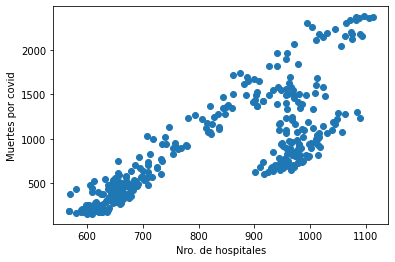

In [854]:
fig, ax = plt.subplots(1,1)
ax.scatter(x = relacion['critical_staffing_shortage_today_yes'], y = relacion['deaths_covid'])
plt.xlabel("Nro. de hospitales")
plt.ylabel("Muertes por covid")

#### ***8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.***

In [629]:
columns8 = ['date', 'critical_staffing_shortage_today_yes', 'deaths_covid', 'previous_day_admission_adult_covid_confirmed']

In [630]:
df_08 = results_df[columns8].sort_values(by='date')
df_08['date'] = pd.to_datetime(df_08['date'])
df_08 = df_08[df_08['date'] >= '2020-01-21']

In [631]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47641 entries, 13737 to 42805
Data columns (total 4 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   date                                          47641 non-null  datetime64[ns]
 1   critical_staffing_shortage_today_yes          47641 non-null  object        
 2   deaths_covid                                  46981 non-null  object        
 3   previous_day_admission_adult_covid_confirmed  41010 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [632]:
df_08.iloc[:,1:4] = df_08.iloc[:,1:4].apply(lambda col: col.astype(float))

In [633]:
df_08.fillna(0, inplace=True)

In [634]:
df_08.head()

,date,critical_staffing_shortage_today_yes,deaths_covid,previous_day_admission_adult_covid_confirmed
13737,2020-01-21,0.0,0.0,0.0
14987,2020-01-21,0.0,0.0,0.0
20845,2020-01-21,0.0,0.0,0.0
15800,2020-01-21,0.0,0.0,0.0
21159,2020-01-21,0.0,0.0,0.0


In [635]:
pandemia_usa = pd.pivot_table(index=['date'], values=['previous_day_admission_adult_covid_confirmed', 'deaths_covid', 'critical_staffing_shortage_today_yes'], data=df_08, aggfunc='sum').reset_index()

In [636]:
pandemia_usa['year'] = pandemia_usa['date'].dt.year
pandemia_usa['month'] = pandemia_usa['date'].dt.month

In [637]:
pandemia_usa

,date,critical_staffing_shortage_today_yes,deaths_covid,previous_day_admission_adult_covid_confirmed,year,month
0,2020-01-21,0.0,0.0,0.0,2020,1
1,2020-01-22,0.0,0.0,0.0,2020,1
2,2020-01-23,0.0,0.0,0.0,2020,1
3,2020-01-24,0.0,0.0,0.0,2020,1
4,2020-01-25,0.0,0.0,0.0,2020,1
...,...,...,...,...,...,...
926,2022-08-04,310.0,178.0,6426.0,2022,8
927,2022-08-05,314.0,183.0,6397.0,2022,8
928,2022-08-06,313.0,175.0,6269.0,2022,8
929,2022-08-07,315.0,169.0,6024.0,2022,8


In [638]:
pandemia_usa = pd.pivot_table(index=['year','month'], values=['previous_day_admission_adult_covid_confirmed', 'deaths_covid', 'critical_staffing_shortage_today_yes'], data=pandemia_usa, aggfunc={'critical_staffing_shortage_today_yes':'max', 'deaths_covid':'sum', 'previous_day_admission_adult_covid_confirmed':'sum'}).reset_index()

In [639]:
pandemia_usa['ym'] = pandemia_usa.apply(lambda row: f"{int(row['year'])}-{int(row['month'])}", axis=1)

In [640]:
pandemia_usa.head(10)

,year,month,critical_staffing_shortage_today_yes,deaths_covid,previous_day_admission_adult_covid_confirmed,ym
0,2020,1,0.0,0.0,0.0,2020-1
1,2020,2,0.0,0.0,0.0,2020-2
2,2020,3,0.0,1118.0,21.0,2020-3
3,2020,4,6.0,33572.0,1810.0,2020-4
4,2020,5,1.0,54884.0,1898.0,2020-5
5,2020,6,2.0,17541.0,1508.0,2020-6
6,2020,7,788.0,19178.0,82899.0,2020-7
7,2020,8,815.0,31259.0,136359.0,2020-8
8,2020,9,931.0,15245.0,109792.0,2020-9
9,2020,10,1015.0,17963.0,165563.0,2020-10


In [641]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = pandemia_usa['ym'], y = pandemia_usa['deaths_covid'], line = dict(color='royalblue', width=2.5), name='Muertes por Covid'))
fig.add_trace(go.Scatter(x = pandemia_usa['ym'], y = pandemia_usa['critical_staffing_shortage_today_yes'], line = dict(color='red', width=2.5), name='Hospitales con personal escaso'))
fig.add_trace(go.Scatter(x = pandemia_usa['ym'], y = pandemia_usa['previous_day_admission_adult_covid_confirmed'], line = dict(color='black', width=2.5), name='Adultos confirmados con covid-19'))

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=f'Cifras mensuales de Pandemia',
                              font=dict(family='Arial',
                                        size=25,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

fig.update_layout(annotations = annotations,
                   xaxis_title='Días del año 2021',
                   plot_bgcolor='rgba(162,222,241,0.15)', # 'white'
                   margin=dict(
                     autoexpand=False,
                     l=90,
                     r=220,
                     t=70,
                    ),
                   xaxis=dict(
                     showline=True,
                     linecolor='rgb(204, 204, 204)',
                     linewidth=2,
                     ticks='outside',
                     tickfont=dict(
                      family='Arial',
                      size=12,
                      color='rgb(82, 82, 82)'
                      )
                   ),
                   yaxis=dict(
                     showline=True,     
                     linecolor='rgb(204, 204, 204)',
                     linewidth=2,
                     ticks='outside',
                     tickfont=dict(
                      family='Arial',
                      size=12,
                      color='rgb(82, 82, 82)'
                      )
                   )                  
                 )
fig.show()

***Conclusión: Se consideró la suma de muertes por mes, así como la suma de adultos confirmados con covid por mes y la mayor frecuencia de confirmacion de hospitales con personal escazo, concluyendose que el mes de Enero de 2020, vendría ser el tiempo donde se obtuvo una mayor cantidad de muertes en toda la pandemia, así como el 3er mes con la mayor cantidad de pacientes admitidos con covid-19, y con una urgencia de personal por parte de 1113 hospitales***

# 02_Dashboard

#### Un mapa que muestre la cantidad de hospitalizados debido al COVID-19 por Estado

##### General

In [731]:
d1g = results_df[columns1].sort_values(by='date')
d1g['date'] = pd.to_datetime(d1g['date'])
d1g.insert(loc=1, column='year', value = d1g['date'].dt.year)
d1g.insert(loc=2, column='month', value = d1g['date'].dt.month)

In [732]:
d1g.iloc[:,4:14] = d1g.iloc[:,4:14].apply(lambda col: col.astype(float))
d1g.fillna(0, inplace=True)

In [733]:
d1g.head()

,date,year,month,state,inpatient_bed_covid_utilization_numerator,previous_day_admission_adult_covid_confirmed,previous_day_admission_adult_covid_confirmed_20_29,previous_day_admission_adult_covid_confirmed_40_49,previous_day_admission_adult_covid_confirmed_50_59,previous_day_admission_adult_covid_confirmed_30_39,previous_day_admission_adult_covid_confirmed_60_69,previous_day_admission_adult_covid_confirmed_70_79,previous_day_admission_adult_covid_confirmed_80,previous_day_admission_adult_covid_confirmed_unknown
17853,2020-01-01,2020,1,MN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13763,2020-01-01,2020,1,IN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15668,2020-01-01,2020,1,PR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21203,2020-01-01,2020,1,LA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,2020-01-01,2020,1,NC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [734]:
d1g_plot = pd.pivot_table(index='state', values=['inpatient_bed_covid_utilization_numerator'], data=d1g, aggfunc='max').sort_values(by='inpatient_bed_covid_utilization_numerator', ascending=False).reset_index()
d1g_plot.head()

,state,inpatient_bed_covid_utilization_numerator
0,CA,30334.0
1,FL,17380.0
2,TX,14917.0
3,NY,13791.0
4,PA,8266.0


In [729]:
import pandas as pd
import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as pg
import matplotlib.pyplot as plt
%matplotlib inline

In [742]:
short_state_names = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [730]:
po.init_notebook_mode(connected = True) ## Para mostrar los diagramas dentro del notebook

In [768]:
est_abg1 = d1g_plot['state'].values
est_nameg1 = [short_state_names[e] for e in est_abg1]

In [826]:
datag1 = dict(type = 'choropleth', 
locations = d1g_plot['state'].values,
locationmode = 'USA-states', 
z = d1g_plot['inpatient_bed_covid_utilization_numerator'].values,
text = est_nameg1)

In [829]:
layoutg1 = dict(title = 'Cantidad de hospitalizados debido a la COVID-19 por Estado (2020-01-01 / Actual)', 
              geo = dict(scope = 'usa' , 
                         showlakes = True, 
                         lakecolor = 'rgb(0,191,255)'))

In [830]:
g1 = pg.Figure(data = [datag1] ,
layout = layoutg1)
g1.update_layout(margin=dict(
                autoexpand=False,
                l=100,
                r=300,
                t=80,
                ),
                   
        )                   
po.iplot(g1)

##### Particular

In [646]:
d1 = pd.pivot_table(index='state', values=['inpatient_bed_covid_utilization_numerator','previous_day_admission_adult_covid_confirmed'], data=df_01, aggfunc={'inpatient_bed_covid_utilization_numerator':'max','previous_day_admission_adult_covid_confirmed':'sum'}).sort_values(by='inpatient_bed_covid_utilization_numerator', ascending=False).reset_index()

In [647]:
d1.head()

,state,inpatient_bed_covid_utilization_numerator,previous_day_admission_adult_covid_confirmed
0,NY,13791.0,14.0
1,TX,7025.0,0.0
2,FL,7008.0,0.0
3,CA,6646.0,0.0
4,AZ,4843.0,1005.0


In [773]:
est_abp1 = d1['state'].values
est_namep1 = [short_state_names[e] for e in est_abp1]

In [774]:
datap1 = dict(type = 'choropleth', 
locations = d1['state'].values,
locationmode = 'USA-states', 
z = d1['inpatient_bed_covid_utilization_numerator'].values,
text = est_namep1)

In [775]:
layoutp1 = dict(geo = {'scope':'usa'})

In [776]:
layoutp1 = dict(title = 'Cantidad de hospitalizados debido a la COVID-19 por Estado (2020-01-01 hasta 2020-06-30)', 
              geo = dict(scope = 'usa' , 
                         showlakes = True, 
                         lakecolor = 'rgb(0,191,255)'))

In [777]:
p1 = pg.Figure(data = [datap1] ,
layout = layoutp1)
p1.update_layout(margin=dict(
                autoexpand=False,
                l=100,
                r=300,
                t=80,
                ),
                   
        )                   
po.iplot(p1)

#### Uso de camas UCI por Estado.


##### General

In [755]:
d2g = results_df[columns3].sort_values(by='date')
d2g['date'] = pd.to_datetime(d2g['date'])
d2g.iloc[:,2:4] = d2g.iloc[:,2:4].apply(lambda col: col.astype(float))
d2g.fillna(0, inplace=True)
d2g['used_icu_beds'] = d2g['staffed_icu_adult_patients_confirmed_covid'] + d2g['staffed_icu_pediatric_patients_confirmed_covid']

In [759]:
d2g.head()

,date,state,staffed_icu_adult_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid,used_icu_beds
17853,2020-01-01,MN,0.0,0.0,0.0
13763,2020-01-01,IN,0.0,0.0,0.0
15668,2020-01-01,PR,0.0,0.0,0.0
21203,2020-01-01,LA,0.0,0.0,0.0
71,2020-01-01,NC,0.0,0.0,0.0


In [761]:
d2g_plot = pd.pivot_table(index='state', values=['used_icu_beds'], data=d2g, aggfunc='max').sort_values(by='used_icu_beds', ascending=False).reset_index()
d2g_plot.head()

,state,used_icu_beds
0,CA,4926.0
1,TX,3900.0
2,FL,3714.0
3,IL,2063.0
4,NY,1650.0


In [778]:
est_abg2 = d2g_plot['state'].values
est_nameg2 = [short_state_names[e] for e in est_abg2]

In [779]:
datag2 = dict(type = 'choropleth', 
locations = d2g_plot['state'].values,
locationmode = 'USA-states', 
z = d2g_plot['used_icu_beds'].values,
text = est_nameg2)
layoutg2 = dict(geo = {'scope':'usa'})

In [782]:
layoutg2 = dict(title = 'Cantidad de uso de camas UCI por Estado (2020-01-01 / Actual)', 
              geo = dict(scope = 'usa' , 
                         showlakes = True, 
                         lakecolor = 'rgb(0,191,255)'))

In [783]:
g2 = pg.Figure(data = [datag2] ,
layout = layoutg2)
g2.update_layout(margin=dict(
                autoexpand=False,
                l=100,
                r=300,
                t=80,
                ),
                   
        )                   
po.iplot(g2)

In [762]:
import plotly.express as px
fig = px.histogram(d2g_plot, x="state", y="used_icu_beds")
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Cantidad de uso de camas UCI por Estado (2020-01-01 / Actual)',
                              font=dict(family='Arial',
                                        size=25,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig.update_layout(annotations = annotations,
                   xaxis_title='Estados de USA',
                   yaxis_title='Uso de camas UCI',
                   plot_bgcolor='rgba(162,222,241,0.15)', # 'white'
                   margin=dict(
                     autoexpand=False,
                     l=90,
                     r=120,
                     t=70,
                    ),
                   xaxis=dict(
                     showline=True,
                     linecolor='rgb(204, 204, 204)',
                     linewidth=2,
                     ticks='outside',
                     tickfont=dict(
                      family='Arial',
                      size=12,
                      color='rgb(82, 82, 82)'
                      )
                   ),
                   yaxis=dict(
                     showline=True,     
                     linecolor='rgb(204, 204, 204)',
                     linewidth=2,
                     ticks='outside',
                     tickfont=dict(
                      family='Arial',
                      size=12,
                      color='rgb(82, 82, 82)'
                      )
                   )                  
                 )
fig.show()

##### Particular

In [691]:
d2 = pd.pivot_table(index='state', values=['used_icu_beds'], data=df_03, aggfunc='max').sort_values(by='used_icu_beds', ascending=False).reset_index()
d2.head()

,state,used_icu_beds
0,CA,4604.0
1,TX,3224.0
2,FL,2200.0
3,PA,1389.0
4,NY,1310.0


In [784]:
est_abp2 = d2['state'].values
est_namep2 = [short_state_names[e] for e in est_abp2]

In [785]:
datap2 = dict(type = 'choropleth', 
locations = d2['state'].values,
locationmode = 'USA-states', 
z = d2['used_icu_beds'].values,
text = est_namep2)
layoutp2 = dict(geo = {'scope':'usa'})

In [786]:
layoutp2 = dict(title = 'Cantidad de uso de camas UCI por Estado (Año 2020)', 
              geo = dict(scope = 'usa' , 
                         showlakes = True, 
                         lakecolor = 'rgb(0,191,255)'))

In [787]:
p2 = pg.Figure(data = [datap2] ,
layout = layoutp2)
p2.update_layout(margin=dict(
                autoexpand=False,
                l=100,
                r=300,
                t=80,
                ),
                   
        )                   
po.iplot(p2)

In [748]:
import plotly.express as px
fig = px.histogram(d2, x="state", y="used_icu_beds")
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Cantidad de uso de camas UCI por Estado (Año 2020)',
                              font=dict(family='Arial',
                                        size=25,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig.update_layout(annotations = annotations,
                   xaxis_title='Estados de USA',
                   yaxis_title='Uso de camas UCI',
                   plot_bgcolor='rgba(162,222,241,0.15)', # 'white'
                   margin=dict(
                     autoexpand=False,
                     l=90,
                     r=120,
                     t=70,
                    ),
                   xaxis=dict(
                     showline=True,
                     linecolor='rgb(204, 204, 204)',
                     linewidth=2,
                     ticks='outside',
                     tickfont=dict(
                      family='Arial',
                      size=12,
                      color='rgb(82, 82, 82)'
                      )
                   ),
                   yaxis=dict(
                     showline=True,     
                     linecolor='rgb(204, 204, 204)',
                     linewidth=2,
                     ticks='outside',
                     tickfont=dict(
                      family='Arial',
                      size=12,
                      color='rgb(82, 82, 82)'
                      )
                   )                  
                 )
fig.show()

#### Ranking de Estados con mayor ocupación hospitalaria por COVID

##### General

In [749]:
d1g_plot.head()

,state,inpatient_bed_covid_utilization_numerator
0,CA,30334.0
1,FL,17380.0
2,TX,14917.0
3,NY,13791.0
4,PA,8266.0


In [751]:
import plotly.express as px
fig = px.histogram(d1g_plot, x="state", y="inpatient_bed_covid_utilization_numerator")
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Ranking de Estados con mayor ocupación hospitalaria por Covid (2020-01-01 / Actual)',
                              font=dict(family='Arial',
                                        size=25,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig.update_layout(annotations = annotations,
                   xaxis_title='Estados de USA',
                   yaxis_title='Ocupación hospitalaria (pacientes)',
                   plot_bgcolor='rgba(162,222,241,0.15)', # 'white'
                   margin=dict(
                     autoexpand=False,
                     l=90,
                     r=120,
                     t=70,
                    ),
                   xaxis=dict(
                     showline=True,
                     linecolor='rgb(204, 204, 204)',
                     linewidth=2,
                     ticks='outside',
                     tickfont=dict(
                      family='Arial',
                      size=12,
                      color='rgb(82, 82, 82)'
                      )
                   ),
                   yaxis=dict(
                     showline=True,     
                     linecolor='rgb(204, 204, 204)',
                     linewidth=2,
                     ticks='outside',
                     tickfont=dict(
                      family='Arial',
                      size=12,
                      color='rgb(82, 82, 82)'
                      )
                   )                  
                 )
fig.show()

##### Particular

In [752]:
d1.head()

,state,inpatient_bed_covid_utilization_numerator,previous_day_admission_adult_covid_confirmed
0,NY,13791.0,14.0
1,TX,7025.0,0.0
2,FL,7008.0,0.0
3,CA,6646.0,0.0
4,AZ,4843.0,1005.0


In [754]:
fig = px.histogram(d1, x="state", y="inpatient_bed_covid_utilization_numerator")
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Ranking de Estados con mayor ocupación hospitalaria por Covid (2020-01-01 / 2020-06-30)',
                              font=dict(family='Arial',
                                        size=25,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig.update_layout(annotations = annotations,
                   xaxis_title='Estados de USA',
                   yaxis_title='Ccupación hospitalaria (pacientes)',
                   plot_bgcolor='rgba(162,222,241,0.15)', # 'white'
                   margin=dict(
                     autoexpand=False,
                     l=90,
                     r=120,
                     t=70,
                    ),
                   xaxis=dict(
                     showline=True,
                     linecolor='rgb(204, 204, 204)',
                     linewidth=2,
                     ticks='outside',
                     tickfont=dict(
                      family='Arial',
                      size=12,
                      color='rgb(82, 82, 82)'
                      )
                   ),
                   yaxis=dict(
                     showline=True,     
                     linecolor='rgb(204, 204, 204)',
                     linewidth=2,
                     ticks='outside',
                     tickfont=dict(
                      family='Arial',
                      size=12,
                      color='rgb(82, 82, 82)'
                      )
                   )                  
                 )
fig.show()

#### Cantidad de camas ocupadas por COVID-19 entre dos fechas elegidas por el usuario.

In [793]:
from datetime import datetime

In [794]:
slider_range = (datetime(2020,1,1), datetime(2021,1,1))

In [792]:
columns = ['date', 'state', 'inpatient_bed_covid_utilization_numerator','total_pediatric_patients_hospitalized_confirmed_covid','staffed_icu_adult_patients_confirmed_covid', 'staffed_icu_pediatric_patients_confirmed_covid' ]

In [800]:
camas_ocup_cov = results_df[columns].sort_values(by='date')
camas_ocup_cov['date'] = pd.to_datetime(camas_ocup_cov['date'])
camas_ocup_cov = camas_ocup_cov.query('(date <= @slider_range[1]) & (date >= @slider_range[0])')
camas_ocup_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16499 entries, 17853 to 34839
Data columns (total 6 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   date                                                   16499 non-null  datetime64[ns]
 1   state                                                  16499 non-null  object        
 2   inpatient_bed_covid_utilization_numerator              16230 non-null  object        
 3   total_pediatric_patients_hospitalized_confirmed_covid  9300 non-null   object        
 4   staffed_icu_adult_patients_confirmed_covid             9533 non-null   object        
 5   staffed_icu_pediatric_patients_confirmed_covid         6057 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 902.3+ KB


In [801]:
camas_ocup_cov.iloc[:,2:6] = camas_ocup_cov.iloc[:,2:6].apply(lambda col: col.astype(float))
camas_ocup_cov.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16499 entries, 17853 to 34839
Data columns (total 6 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   date                                                   16499 non-null  datetime64[ns]
 1   state                                                  16499 non-null  object        
 2   inpatient_bed_covid_utilization_numerator              16230 non-null  float64       
 3   total_pediatric_patients_hospitalized_confirmed_covid  9300 non-null   float64       
 4   staffed_icu_adult_patients_confirmed_covid             9533 non-null   float64       
 5   staffed_icu_pediatric_patients_confirmed_covid         6057 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 902.3+ KB


In [803]:
camas_ocup_cov.fillna(0, inplace=True)

In [805]:
camas_ocup_cov['occupied_beds'] = camas_ocup_cov.iloc[:,2:6].sum(axis=1)

In [808]:
camas_ocup_cov = pd.pivot_table(index=['date'], values=['occupied_beds'], data=camas_ocup_cov, aggfunc='sum').reset_index()

In [811]:
# CAMA COMUN (ADULTOS) + CAMA COMUN (PEDIATRICO) + CAMA UCI (ADULTOS + PEDIATRICO)
camas_ocup_cov

,date,occupied_beds
0,2020-01-01,0.0
1,2020-01-02,2283.0
2,2020-01-03,2283.0
3,2020-01-04,2283.0
4,2020-01-05,2283.0
...,...,...
362,2020-12-28,158098.0
363,2020-12-29,160365.0
364,2020-12-30,161897.0
365,2020-12-31,160877.0


In [818]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = camas_ocup_cov['date'], y = camas_ocup_cov['occupied_beds'], line = dict(color='royalblue', width=2.5)))


annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=f'Cantidad de camas ocupadas por Covid-19 en USA',
                              font=dict(family='Arial',
                                        size=25,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

fig.update_layout(annotations = annotations,
                   xaxis_title='Días',
                   yaxis_title='Cantidad de camas ocupadas',
                   plot_bgcolor='rgba(162,222,241,0.15)', 
                   margin=dict(
                     autoexpand=False,
                     l=90,
                     r=70,
                     t=70,
                    ),
                   xaxis=dict(
                     showline=True,
                     linecolor='rgb(204, 204, 204)',
                     linewidth=2,
                     ticks='outside',
                     tickfont=dict(
                      family='Arial',
                      size=12,
                      color='rgb(82, 82, 82)'
                      )
                   ),
                   yaxis=dict(
                     showline=True,     
                     linecolor='rgb(204, 204, 204)',
                     linewidth=2,
                     ticks='outside',
                     tickfont=dict(
                      family='Arial',
                      size=12,
                      color='rgb(82, 82, 82)'
                      )
                   )                  
                 )
fig.show()